In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100.0%

Files already downloaded and verified


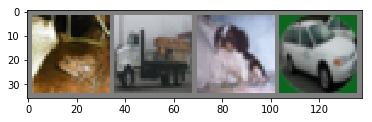

 frog truck   dog   car
tensor([6, 9, 5, 1])


In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))
print(labels)

In [7]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()


In [8]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [13]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        print(labels)
        print(outputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')


tensor([8, 9, 9, 7])
tensor([[ 0.3408, -1.2189,  1.5753,  0.4489,  0.5366,  0.1602, -1.3281, -0.2200,
          0.7651, -0.1718],
        [ 2.8605,  1.6015,  0.1284, -0.4570, -0.7669, -2.1672, -2.5947, -1.9984,
          4.7565,  2.0728],
        [ 0.6884,  2.7030, -0.5842,  0.0685, -0.1813, -0.6678, -1.9265, -0.0135,
         -0.6325,  2.0930],
        [-1.1476, -2.5394,  1.2092,  1.7554, -0.5777,  1.7278, -0.5015,  1.7145,
         -1.5731, -0.2885]], grad_fn=<AddmmBackward>)
tensor([3, 0, 6, 4])
tensor([[-1.3565, -1.6549, -0.0552,  1.6303,  0.1312,  1.2789,  0.8246,  0.4261,
         -0.9556, -0.1907],
        [ 4.0390, -3.7249,  2.7713,  1.3013, -0.4398, -0.4342, -1.6218, -1.5054,
          4.1669, -1.8644],
        [-4.0676, -2.5523,  3.1574,  1.5041, -0.0861,  1.3064,  6.2442, -1.0061,
         -2.3254, -4.0975],
        [-1.1411, -5.1746,  3.7643,  2.1903,  5.4856,  2.5950,  0.4107,  1.3094,
         -4.0207, -4.8025]], grad_fn=<AddmmBackward>)
tensor([3, 5, 9, 6])
tensor([[-2.5

tensor([4, 4, 0, 1])
tensor([[ 0.7517, -2.0893,  2.1541,  2.2934,  3.5482,  1.4991, -1.7175,  0.0751,
         -2.1004, -2.7380],
        [ 0.2242, -1.9975,  1.1690,  1.0371,  3.2018, -0.3405, -1.0667,  0.4518,
         -1.0792, -1.3035],
        [ 6.2087, -1.2166,  0.6044, -0.6621,  0.2261, -2.2655, -1.9111, -2.3240,
          1.9355,  0.9765],
        [ 0.6383,  4.0273, -1.2914, -0.2084, -0.9014, -1.2128, -2.3531, -1.5576,
          0.8506,  2.8554]], grad_fn=<AddmmBackward>)
tensor([4, 2, 9, 0])
tensor([[-0.7548, -2.3243,  1.9834, -0.5180,  3.5117,  0.2778, -0.4515,  4.3279,
         -3.1360, -1.8549],
        [-1.4076, -0.8069,  0.5399,  1.3974, -0.1358,  1.0435,  0.4586,  0.9143,
         -1.6689, -0.3358],
        [ 3.6787,  4.1090, -4.5009,  0.7548, -4.4314, -1.5202, -0.9341, -2.9249,
          0.7230,  8.4027],
        [ 5.7550,  1.7456,  2.0365, -0.3866, -2.0103, -2.7351, -2.4024, -2.3842,
          3.8761, -0.0989]], grad_fn=<AddmmBackward>)
tensor([0, 0, 7, 3])
tensor([[ 5.9

tensor([0, 2, 1, 2])
tensor([[ 0.2639,  2.3857, -0.6171, -0.3302,  0.0613, -1.9359,  0.5810, -2.1963,
          2.1935,  0.3334],
        [-3.5238, -4.3785,  2.1428,  3.1418,  0.0180,  5.5559,  1.0905,  1.6068,
         -3.2488, -3.6962],
        [ 0.7166,  6.6709, -1.9073, -1.2836, -2.0983, -3.4980, -1.6533, -2.2012,
          4.5437,  2.2794],
        [ 0.0717, -3.0187,  2.3671,  0.9944, -0.2900,  0.3392,  1.1682, -0.6190,
          0.8306, -0.9631]], grad_fn=<AddmmBackward>)
tensor([2, 6, 5, 8])
tensor([[-1.9663, -4.0826,  3.0239,  3.9314, -0.4455,  6.0404,  0.2270,  2.5412,
         -5.5094, -2.9920],
        [-3.2891, -0.0121,  1.8066,  0.9602, -0.3889, -0.3327,  6.4092, -3.0770,
         -0.3955, -2.5006],
        [-3.4412, -4.3075,  1.7350,  3.6993, -1.7005,  6.2402,  1.1229,  2.0200,
         -3.4969, -3.9293],
        [-0.1730, -2.2135,  2.2424,  0.7769,  2.3941, -0.0928,  1.1961, -0.7160,
         -1.0125, -2.3218]], grad_fn=<AddmmBackward>)
tensor([9, 0, 0, 9])
tensor([[ 0.8

tensor([6, 2, 4, 9])
tensor([[-0.6067, -1.7729,  3.7032, -0.1650,  1.0779, -0.6656,  7.8808, -4.2917,
         -3.0112, -3.7947],
        [-2.6865, -3.1162,  2.4644,  2.4641,  1.6433,  1.5273,  1.0388,  1.8550,
         -3.8005, -1.2148],
        [-1.4937, -1.7304,  2.1674, -0.0907,  4.4810, -0.1037,  0.5149,  1.2212,
         -2.5655, -2.2265],
        [-0.6963,  3.9789, -1.0379,  1.4528, -2.4760,  0.5689, -1.0269, -0.1682,
         -2.0934,  2.5799]], grad_fn=<AddmmBackward>)
tensor([0, 2, 2, 5])
tensor([[ 2.8784,  0.8233,  0.3861,  0.0205,  0.2562, -2.2703, -2.2639, -0.8317,
          2.8112,  1.3586],
        [ 2.1268, -4.7869,  6.4039,  1.0887,  3.0948,  0.5961, -0.5071,  0.1346,
         -1.5343, -4.8369],
        [-4.8396, -3.7442,  5.0322,  2.2665,  3.8197,  2.1177,  3.3507,  0.3839,
         -5.0269, -4.0796],
        [-1.8785, -2.0409,  1.1084,  1.8997,  2.8769,  1.4491,  0.3490,  1.3588,
         -3.0890, -1.4770]], grad_fn=<AddmmBackward>)
tensor([6, 6, 7, 5])
tensor([[-4.2

tensor([1, 6, 9, 4])
tensor([[-2.7226,  6.3245, -0.3085,  1.8812, -3.4720, -1.2521, -1.4324, -2.1648,
         -0.1481,  3.7934],
        [-1.0610, -3.1049,  3.9716,  1.8007,  0.3971,  2.3649,  1.0945,  0.0367,
         -2.8022, -3.0753],
        [-0.1275,  4.4567, -0.4551, -0.3051, -4.3186, -2.2813, -1.2878, -1.6114,
          1.3597,  5.3315],
        [-0.7776, -2.4272,  1.8591, -0.3481,  4.5614,  0.7468,  0.2583,  4.5923,
         -4.8339, -2.7550]], grad_fn=<AddmmBackward>)
tensor([7, 6, 8, 2])
tensor([[ 0.5754, -2.8501,  1.1152,  2.2251,  2.8271,  2.1977, -1.1576,  1.1097,
         -2.6082, -2.5882],
        [-0.9376,  0.7695, -0.1998,  1.2800, -0.8649,  0.2459,  1.6489, -0.8607,
         -1.6037,  0.8216],
        [ 0.8450,  2.9885,  1.1921,  0.1109, -1.7155, -2.9378,  3.5240, -3.9905,
          1.8541, -1.7398],
        [ 1.0320, -0.1123,  3.6998,  0.4374, -1.2010, -1.2322,  2.2487, -2.9419,
          1.5955, -2.1860]], grad_fn=<AddmmBackward>)
tensor([9, 5, 5, 8])
tensor([[-1.3

tensor([0, 1, 3, 9])
tensor([[ 2.8616,  1.6052, -0.6305, -0.3971, -1.4762, -1.8188,  0.8231, -2.0454,
          2.1027, -0.0923],
        [ 0.3714, -0.0273,  0.5345,  1.5092, -0.4345,  2.0970, -1.7849,  0.7744,
         -2.0543, -1.0404],
        [-0.0418, -3.4471,  3.2877,  2.4401,  1.6466,  1.6046,  0.1192,  0.9530,
         -2.5070, -2.9419],
        [ 1.1983,  4.7898, -1.5731, -0.4005, -1.7026, -2.9948, -1.5341, -3.1336,
          0.3764,  6.4825]], grad_fn=<AddmmBackward>)
tensor([9, 5, 0, 1])
tensor([[ 1.1321,  1.6159, -1.1842,  2.9648, -1.8226,  0.9324, -2.0963,  0.8769,
         -3.2208,  2.8093],
        [-1.8625, -2.9525,  2.3814,  2.1449, -0.5971,  3.1682, -0.1289,  1.6950,
         -2.4770, -1.3807],
        [ 5.5328,  0.0959,  1.4845, -0.2983,  0.4986, -2.5551, -3.1513, -1.8331,
          3.5792,  0.4703],
        [ 1.1836,  7.6056, -2.6696, -1.8164, -2.1605, -3.7033, -1.6746, -3.5956,
          3.1268,  4.0862]], grad_fn=<AddmmBackward>)
tensor([9, 0, 2, 3])
tensor([[-3.5

tensor([[-0.4176, 14.8935, -2.7882, -1.7400, -2.5035, -2.2403, -3.6601, -3.3167,
         -0.5695,  4.6474],
        [ 4.3201, -4.7437,  4.4413,  0.5700,  2.6651, -0.0300, -1.4400, -0.4849,
         -0.0464, -3.4692],
        [ 5.0965, -5.2494,  7.4036,  1.4616,  1.1132, -0.8300, -0.2440, -1.9563,
          1.0095, -5.0806],
        [ 0.4011, -2.5364,  0.1516,  2.5755,  1.2917,  1.5824, -1.2690,  2.2743,
         -2.4291, -0.2690]], grad_fn=<AddmmBackward>)
tensor([1, 4, 5, 4])
tensor([[ 0.2936, 10.0186, -3.5338,  0.0211, -5.4697, -1.6431, -1.7771, -3.2246,
          2.1508,  4.6646],
        [-1.0907, -1.1272,  0.3499,  2.6645,  0.2176,  0.9083,  0.1876,  0.9763,
         -2.6814,  0.7341],
        [-1.0849,  0.2263, -0.6253,  2.9985, -0.5659,  2.9144, -1.1842,  0.6328,
         -1.8152, -0.8830],
        [-1.6114, -0.3982,  0.5302,  0.5014,  1.7395, -0.2519, -0.9717,  1.3138,
         -1.8834,  1.8699]], grad_fn=<AddmmBackward>)
tensor([5, 0, 7, 8])
tensor([[-2.1284,  2.1048, -0.8125

tensor([9, 4, 3, 1])
tensor([[ 0.6289,  2.3119, -1.4822, -0.1928,  0.6939, -1.4564, -3.3184, -0.8336,
          0.2093,  3.9909],
        [-2.8518, -2.0953,  1.7643,  1.3364,  3.3351,  0.4655,  1.5818,  0.6248,
         -3.5454, -1.0091],
        [ 0.3054,  0.5019, -0.4907,  2.1127, -2.9858,  1.2025, -0.1003,  0.3975,
         -1.2016,  0.7907],
        [ 2.2034, 12.0063, -2.3785, -3.2703, -1.9714, -3.1525, -2.4787, -3.2062,
         -0.0643,  3.5984]], grad_fn=<AddmmBackward>)
tensor([3, 2, 0, 5])
tensor([[ 2.5960, -0.5570,  0.2363,  1.0645, -1.2825, -0.1189, -0.2333, -2.2327,
          1.9114, -0.4656],
        [-1.9602, -2.4440,  0.8126,  2.3281,  1.1601,  1.9344,  1.7435,  0.8590,
         -2.7103, -1.6399],
        [ 7.1873, -1.3864,  2.4766, -1.9146,  2.1909, -3.5163, -3.7813, -2.4896,
          3.4715, -0.2288],
        [-0.9053, -3.2031,  1.6458,  4.0893, -0.2690,  4.6894, -0.4809,  0.2724,
         -3.4988, -2.4368]], grad_fn=<AddmmBackward>)
tensor([4, 0, 8, 8])
tensor([[ 3.1

tensor([0, 2, 1, 9])
tensor([[11.9253,  0.4733,  5.0233, -1.0496,  0.2251, -5.7506, -5.6453, -4.4393,
          7.4706, -0.4948],
        [-0.1329, -1.4684,  3.2878,  0.3611,  1.0968,  0.2888,  1.8647, -1.8588,
         -1.6660, -2.1758],
        [ 0.7025,  4.8446, -0.5081, -0.7276, -2.6560, -1.7679, -2.1782, -2.8641,
          2.0697,  2.8818],
        [-0.8693,  2.1680, -0.5614, -0.6168, -1.2601, -1.9986,  0.1704, -1.9164,
          0.8513,  4.0336]], grad_fn=<AddmmBackward>)
tensor([5, 5, 4, 7])
tensor([[-0.0110, -3.9894,  4.4761,  1.6207,  1.6599,  0.8777,  2.2848, -0.6504,
         -2.1672, -3.1096],
        [-1.0966, -4.3071,  2.7997,  4.1920, -1.3458,  7.5418, -1.1616,  2.7759,
         -4.9757, -5.1065],
        [ 2.7329, -1.2450,  2.3400, -0.6746,  2.4503, -1.7612, -0.2466, -1.9082,
          0.9039, -1.9122],
        [ 2.1812, -3.9316,  2.8633,  0.2627,  4.9545,  0.5758, -0.3759,  0.8272,
         -2.5530, -3.3757]], grad_fn=<AddmmBackward>)
tensor([5, 3, 7, 5])
tensor([[-4.6

tensor([7, 2, 1, 7])
tensor([[-1.5744, -0.6108,  0.1942,  1.1838,  0.4553,  1.6135,  0.0420,  0.9578,
         -2.6540,  0.7133],
        [-0.4602, -3.8984,  3.4227,  1.3103,  3.1321,  1.6761,  1.7257, -0.3847,
         -2.6614, -3.6355],
        [ 2.5555,  6.0892, -1.9406, -2.0331, -2.6332, -3.3001, -2.0426, -2.4864,
          1.7608,  5.4100],
        [ 1.5724, -3.7058,  2.2575,  2.6185,  1.2918,  2.6671, -2.2584,  5.3437,
         -5.3154, -1.3909]], grad_fn=<AddmmBackward>)
tensor([2, 6, 3, 7])
tensor([[ 5.2477e+00, -2.2882e+00,  5.2692e+00,  1.9789e+00,  2.3953e-01,
          5.7135e-01, -1.7370e+00, -8.8921e-02, -1.1761e+00, -4.2422e+00],
        [-1.8184e+00, -2.5248e+00,  1.6689e+00,  2.9636e+00, -1.5235e+00,
          9.4615e-01,  7.3560e+00, -1.1686e+00, -4.4023e+00, -1.2983e+00],
        [-1.9847e+00, -2.2954e+00,  8.7697e-01,  2.8481e+00,  2.2284e+00,
          1.8034e+00,  2.7194e+00, -4.2602e-03, -2.9247e+00, -3.1422e+00],
        [-6.3710e-01, -9.4642e-01, -1.9710e+00, -

tensor([4, 0, 0, 1])
tensor([[-2.5890, -2.0982,  1.3614,  2.0353,  1.6825,  1.7065,  1.7231,  0.3958,
         -2.4438, -2.3362],
        [ 4.2756,  4.1564, -1.4710, -1.7088, -1.0628, -3.6668, -1.9791, -3.5712,
          3.7566,  3.2184],
        [ 3.0900, -1.1416,  2.1483, -0.8187,  1.4773, -0.2681, -0.5181, -1.3726,
         -0.2081, -1.7185],
        [ 1.4810, 10.9113, -1.1818, -1.2558, -3.1910, -2.8451, -0.7405, -2.3268,
         -0.0916,  1.4306]], grad_fn=<AddmmBackward>)
tensor([7, 8, 0, 0])
tensor([[-2.1866, -5.1638,  2.9423, -0.5082,  6.5897,  2.7389, -0.6714,  7.8323,
         -7.2553, -3.1942],
        [ 7.1683,  2.9151,  0.0519, -1.0474, -0.6620, -3.4026, -4.5585, -3.4555,
          6.5156,  1.6349],
        [ 8.5332,  3.1065,  0.6082, -1.9675,  0.5362, -4.4234, -4.2090, -3.0830,
          3.9885,  1.1056],
        [ 5.0253,  0.2346,  3.1385, -3.0497,  1.4344, -3.9672, -0.6987, -5.8348,
          3.8169, -0.4559]], grad_fn=<AddmmBackward>)
tensor([3, 3, 5, 7])
tensor([[-1.5

KeyboardInterrupt: 

# Test

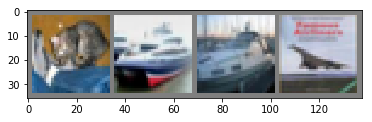

GroundTruth:    cat  ship  ship plane


In [14]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [15]:
outputs = net(images)

In [16]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat  ship   car plane


In [23]:
predicted

tensor([3, 8, 1, 0])